In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [10]:
from aphasia.data.tabular import get_tabular_data
from aphasia.models.cvae import CVAE
from aphasia.models.train import train_cvae, generate_from_cvae
from aphasia.models.tab_search import cross_validate
from aphasia.common.utils import make_cm

from sklearn.preprocessing import label_binarize
import tensorflow as tf
import keras
import wandb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 4
N_CLASSES = 7
LATENT_DIM = 7
N_EPOCHS = 25

In [5]:
X, y = get_tabular_data('white', path_to_data='../datasets')
y = tf.convert_to_tensor(label_binarize(y, classes=list(range(N_CLASSES))), dtype=tf.float32)

dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(BATCH_SIZE)

In [6]:
enc_layers = {
    'fc': {
        'units': 32,
        'activation': 'relu'
    },
    'bn': {},
    'fc': {
        'units': 16,
        'activation': 'relu'
    },
    'bn': {}
}

dec_layers = {
    'fc': {
        'units': 16,
        'activation': 'relu'
    },
    'bn': {},
    'fc': {
        'units': 32,
        'activation': 'relu'
    },
    'bn': {}
}

In [7]:
model = CVAE(enc_layers, dec_layers, X.shape[1], LATENT_DIM, N_CLASSES)
optim = keras.optimizers.legacy.RMSprop()

In [8]:
train_cvae(model, optim, dataset, N_EPOCHS)

 11%|█         | 11/98 [00:00<00:02, 36.37it/s]

EPOCH 0. Loss = [0.24372572 0.2955734  0.33935973 0.27780202]


 10%|█         | 10/98 [00:00<00:02, 43.47it/s]

EPOCH 1. Loss = [0.07844175 0.07079442 0.11164055 0.06997484]


  8%|▊         | 8/98 [00:00<00:02, 37.67it/s]

EPOCH 2. Loss = [0.05228061 0.07848828 0.08886528 0.04508639]


 10%|█         | 10/98 [00:00<00:02, 43.72it/s]

EPOCH 3. Loss = [0.05208264 0.0896014  0.07446549 0.05722504]


 10%|█         | 10/98 [00:00<00:02, 43.42it/s]

EPOCH 4. Loss = [0.03263684 0.09589501 0.07602251 0.05348689]


 10%|█         | 10/98 [00:00<00:02, 42.27it/s]

EPOCH 5. Loss = [0.03930896 0.06560341 0.08009905 0.03278493]


 10%|█         | 10/98 [00:00<00:02, 42.88it/s]

EPOCH 6. Loss = [0.05322237 0.09095974 0.06978828 0.03795423]


 10%|█         | 10/98 [00:00<00:02, 43.57it/s]

EPOCH 7. Loss = [0.03762933 0.07356856 0.07853644 0.03491488]


 10%|█         | 10/98 [00:00<00:02, 43.93it/s]

EPOCH 8. Loss = [0.03432583 0.06966135 0.0807958  0.03445978]


 10%|█         | 10/98 [00:00<00:01, 44.20it/s]

EPOCH 9. Loss = [0.03110462 0.10383237 0.06357545 0.0443901 ]


 10%|█         | 10/98 [00:00<00:02, 43.41it/s]

EPOCH 10. Loss = [0.03336615 0.08445335 0.08199426 0.037691  ]


 10%|█         | 10/98 [00:00<00:01, 44.27it/s]

EPOCH 11. Loss = [0.05110054 0.0789277  0.0855902  0.0406482 ]


 10%|█         | 10/98 [00:00<00:01, 45.18it/s]

EPOCH 12. Loss = [0.06019981 0.08554279 0.0807667  0.0437829 ]


 10%|█         | 10/98 [00:00<00:01, 45.60it/s]

EPOCH 13. Loss = [0.03302404 0.08868597 0.08330787 0.02841484]


 10%|█         | 10/98 [00:00<00:01, 44.81it/s]

EPOCH 14. Loss = [0.03221969 0.08421759 0.08330392 0.04448966]


 10%|█         | 10/98 [00:00<00:01, 45.07it/s]

EPOCH 15. Loss = [0.04168652 0.08129085 0.08740954 0.03827028]


 10%|█         | 10/98 [00:00<00:01, 46.12it/s]

EPOCH 16. Loss = [0.03798224 0.08457448 0.08373997 0.03679835]


 10%|█         | 10/98 [00:00<00:01, 45.34it/s]

EPOCH 17. Loss = [0.0508986  0.0838035  0.09040032 0.03765108]


 10%|█         | 10/98 [00:00<00:01, 45.48it/s]

EPOCH 18. Loss = [0.03802212 0.09212455 0.08186989 0.04272753]


 10%|█         | 10/98 [00:00<00:01, 45.61it/s]

EPOCH 19. Loss = [0.03156266 0.09832148 0.08899616 0.04031248]


  8%|▊         | 8/98 [00:00<00:02, 37.28it/s]

EPOCH 20. Loss = [0.04329844 0.08500734 0.08685311 0.03281621]


  8%|▊         | 8/98 [00:00<00:02, 34.82it/s]

EPOCH 21. Loss = [0.03122802 0.09343041 0.08550955 0.03998626]


 10%|█         | 10/98 [00:00<00:02, 42.92it/s]

EPOCH 22. Loss = [0.03458705 0.0952558  0.08858592 0.04502565]


 10%|█         | 10/98 [00:00<00:01, 44.88it/s]

EPOCH 23. Loss = [0.036885   0.08178587 0.08522086 0.03539747]


 10%|█         | 10/98 [00:00<00:01, 45.52it/s]

EPOCH 24. Loss = [0.03891216 0.09124335 0.08268922 0.05006471]


100%|██████████| 98/98 [00:02<00:00, 43.86it/s]


In [47]:
X, y = get_tabular_data('white', path_to_data='../datasets')
Xt = np.empty(X.shape)
yt = np.empty(y.shape)

unique, counts = np.unique(y, return_counts=True)
y_val = dict(zip(unique, counts))
for c, count in y_val.items():
    Xt = np.append(Xt, generate_from_cvae(model, 150, c, N_CLASSES), axis=0)
    yt = np.append(yt, np.ones(150) * c, axis=0).astype(int)

In [49]:
cross_validate(X, y, RandomForestClassifier, 'clf', params)

TypeError: 'StratifiedKFold' object is not callable

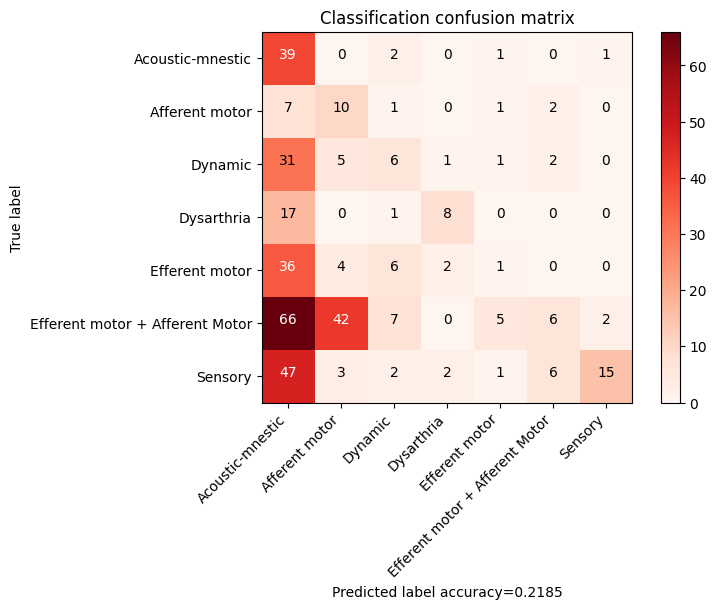

In [48]:
from sklearn.ensemble import RandomForestClassifier
import json
with open('../Pickle/params/rf.json') as file:
    params = json.load(file)

rf = RandomForestClassifier(**params)
rf.fit(Xt, yt)
pred = rf.predict(X)
make_cm([(y, pred)])